# Import Libraries

In [1]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Download Data
- We will use MNIST dataset (Handwritten digits)

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# Numpy array of images

In [3]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

# Plot Examples

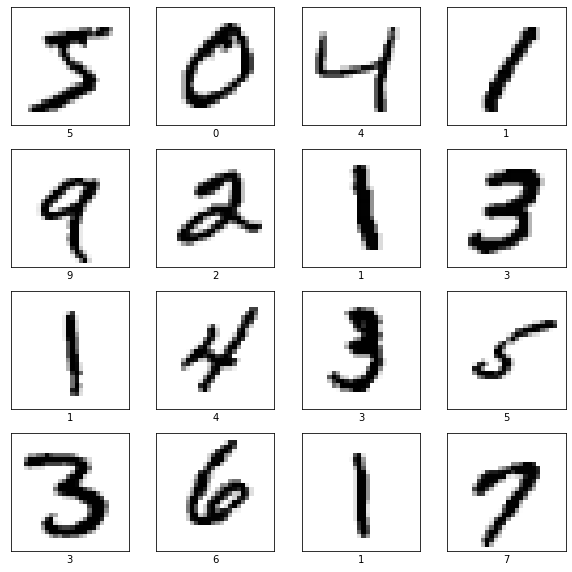

In [4]:
plt.figure(figsize=(10,10))

for i in range (0, 16):
    plt.subplot(4, 4, i+1) # index must be from 1
    #subplot(rows, columns, index)
    plt.imshow(x_train[i], cmap='binary') # Dataset does not have color info
    plt.xlabel(str(y_train[i]))
    plt.xticks([]) # Remove x axis bar
    plt.yticks([]) # Remove y axis bar
plt.show()

# Normalize Data

In [5]:
print(x_test.shape) #10000 examples of 28x28 image
print(x_train.shape) # 60000 examples of 28x28 image

x_train = np.reshape(x_train, (60000, 28*28)) # Unroll separate 28, 28 to single array of 784(28*28)
x_test = np.reshape(x_test, (-1, 28*28)) # -1 will check the length and applies itself (use if unknown)

print(x_train.shape)
print(x_test.shape)

#Normalizing values from 0 to 1
x_train = x_train / 255.
x_test = x_test / 255.

(10000, 28, 28)
(60000, 28, 28)
(60000, 784)
(10000, 784)


In [7]:
print(x_train[0])
x_train[0].shape

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

(784,)

# Create a Neural Network Model

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='sigmoid', input_shape=(784,)), # sigmoid gives values between 0 and 1 (easy for visualization)
    # relu gives better accuracy than sigmoid so we may use relu and normalize data for visualizing
    tf.keras.layers.Dense(32, activation='sigmoid'),
    tf.keras.layers.Dense(10, activation='softmax') # get probability across 10 classes
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Train the Model

In [10]:
_ = model.fit(
    x_train, y_train,
    validation_data = (x_test, y_test),
    epochs = 20, batch_size = 1024, # try with batch_size = 2048
    verbose = 2
)

Epoch 1/20
59/59 - 0s - loss: 0.3618 - accuracy: 0.9095 - val_loss: 0.3454 - val_accuracy: 0.9124
Epoch 2/20
59/59 - 1s - loss: 0.3355 - accuracy: 0.9147 - val_loss: 0.3235 - val_accuracy: 0.9156
Epoch 3/20
59/59 - 1s - loss: 0.3136 - accuracy: 0.9191 - val_loss: 0.3042 - val_accuracy: 0.9199
Epoch 4/20
59/59 - 1s - loss: 0.2949 - accuracy: 0.9237 - val_loss: 0.2875 - val_accuracy: 0.9249
Epoch 5/20
59/59 - 0s - loss: 0.2793 - accuracy: 0.9267 - val_loss: 0.2742 - val_accuracy: 0.9270
Epoch 6/20
59/59 - 0s - loss: 0.2646 - accuracy: 0.9305 - val_loss: 0.2618 - val_accuracy: 0.9297
Epoch 7/20
59/59 - 0s - loss: 0.2524 - accuracy: 0.9335 - val_loss: 0.2516 - val_accuracy: 0.9327
Epoch 8/20
59/59 - 0s - loss: 0.2407 - accuracy: 0.9358 - val_loss: 0.2423 - val_accuracy: 0.9341
Epoch 9/20
59/59 - 1s - loss: 0.2310 - accuracy: 0.9386 - val_loss: 0.2329 - val_accuracy: 0.9376
Epoch 10/20
59/59 - 0s - loss: 0.2219 - accuracy: 0.9403 - val_loss: 0.2268 - val_accuracy: 0.9377
Epoch 11/20
59/59 -

# Save the Model

In [11]:
model.save('model.h5') # Check the file directory for saved model

# ML Server
- We are trying to make model run separately and web app run separately.
- They interact via a REST calls
- Model_server <--POST--> Web App
- This would be good for multiple webapp instances to run from a single model

In [27]:
%%writefile ml_server.py
# Creating file and writing it from jupyter

import json 
import tensorflow as tf
import random
import numpy as np

from flask import Flask, request

app = Flask(__name__)

model = tf.keras.models.load_model('model.h5')
# This model will give final predictions but not the values of hidden layers
# Create another model with keras api which gives the output of all layers too
feature_model = tf.keras.models.Model(
    model.inputs, # input
    [layer.output for layer in model.layers] #List of Output of all layers as output
)

_, (x_test, _) = tf.keras.datasets.mnist.load_data()
x_test = x_test / 255. # Normalizing
# we need to visualize this so no reshaping

def get_predictions():
    index = np.random.choice(x_test.shape[0]) # Choosing 1 from all available
    image = x_test[index, :, :]
    image_arr = np.reshape(image, (1, 784))
    return feature_model.predict(image_arr), image #Sending image & prediction


@app.route('/', methods=['GET', 'POST'])
def index():
    if request.method == 'POST':
        preds, image = get_predictions()
        # Json can send list and not numpy arrays
        final_preds = [p.tolist() for p in preds] # Numpy to list
        return json.dumps({
            'prediction': final_preds,
            'image': image.tolist()
        })
    return "Welcome to the ML Server"


if __name__ == "__main__":
    app.run()
    

Overwriting ml_server.py


# Streamlit Web App
- We doesnot need to know web development to create webapps with Streamlit

In [37]:
%%writefile app.py

import streamlit as st
import json
import requests
import matplotlib.pyplot as plt
import numpy as np

URI = 'http://127.0.0.1:5000'

st.title('Neural Network Visualizer')
#st.markdown('## Input Image') # To create a heading with markdown
st.sidebar.markdown('## Input Image')

if st.button("Get Random Predictions"):
    # Our mlserver will trigger with any post request without any data
    response = requests.post(URI, data={})
    response = json.loads(response.text)
    preds = response.get('prediction')
    image = response.get('image')
    image = np.reshape(image, (28, 28))
    
    st.sidebar.image(image, width=150) # To show image in sidebar
    
    for layer, p in enumerate(preds):
        
        numbers = np.squeeze(np.array(p))
        
        plt.figure(figsize=(32, 4))
        
        if layer == 2:
            row = 1
            col = 10
        else:
            row = 2
            col = 16
            
        for i, number in enumerate(numbers):
            plt.subplot(row, col, i+1)
            plt.imshow(number * np.ones((8, 8, 3)).astype('float32'))
            #np.ones() - with create white boxes
            plt.xticks([])
            plt.yticks([])
            
            if layer == 2:
                plt.xlabel(str(i), fontsize = 40)
        plt.subplots_adjust(wspace=0.05, hspace=0.05)
        plt.tight_layout()
        st.text('Layer {}'.format(layer+1))
        st.pyplot()
    st.text('* Higher values are lighter in color')

Overwriting app.py
